In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def feature_matrix(input_vector, basis_func, k):
    matrix = []
    for elem in input_vector:
        matrix.append(
            [basis_func(elem, i) for i in range(k)]
        )
    return np.asarray(matrix)

In [4]:
def get_weights(phi, output):
    return np.linalg.lstsq(phi, output)[0]

In [5]:
data = [(1, 3),(2, 2),(3, 0),(4, 5)]
xs = [x for x, y in data]
ys = np.asarray([y for x, y in data])

In [6]:
weights = []
for k_val in range(1, 5):
    phi = feature_matrix(xs, lambda k, i: k ** i, k_val)
    weights.append(get_weights(phi, ys))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


In [7]:
def predict_y(weights, xs):
    tot_arr = []
    for x in xs:
        total = 0
        for i, weight in enumerate(weights):
            total += (weight * (x ** i))
        tot_arr.append(total)
    return tot_arr

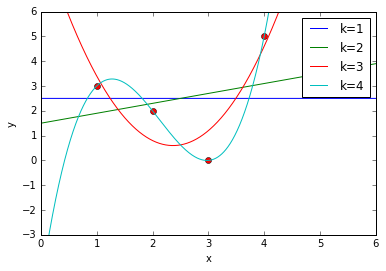

In [8]:
plt.axis([0, 6, -3, 6])
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys, 'ro')
line = [i/1000 for i in range(0, 6000)]
for i in range(1, 5):
    plt.plot(line, predict_y(weights[i - 1], line), label="k={}".format(i))
    plt.legend()

In [8]:
# equations
for weight in weights:
    print(weight)

[2.5]
[1.5 0.4]
[ 9.  -7.1  1.5]
[-5.         15.16666667 -8.5         1.33333333]


In [9]:
def mse(weight):
    predicted_ys = predict_y(weight, xs)
    lse = sum([(ys[i] - predicted_ys[i]) ** 2 for i in range(len(ys))])
    return lse / len(ys)

In [10]:
# MSE values
for i in range(1, 5):
    print("MSE for k = {} : {}".format(i, mse(weights[i - 1])))

MSE for k = 1 : 3.25
MSE for k = 2 : 3.0499999999999994
MSE for k = 3 : 0.7999999999999998
MSE for k = 4 : 6.589355141311112e-27


In [11]:
# Question 2.1



In [12]:
from math import sin, pi
def g_func(x):
    return sin(2 * pi * x) ** 2

In [13]:
def create_random_data(n, sigma, mu):
    S = []
    XS = []
    for _ in range(n):
        x = np.random.uniform()
        S.append(g_func(x) + np.random.normal(mu, sigma))
        XS.append(x)
    return XS, S

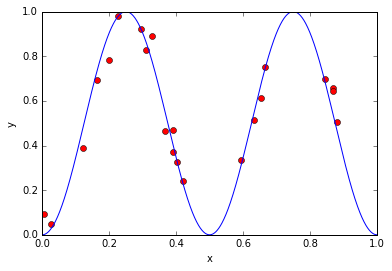

In [14]:
xs, sample_data = create_random_data(30, 0.07, 0)
sine = [i / 1000 for i in range(1, 1000)]
plt.axis([0, 1, 0, 1])
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, sample_data, 'ro')
plt.plot(sine, [g_func(x) for x in sine])

In [18]:
weights = []
for k_val in [2, 5, 10, 14, 18]:
    phi = feature_matrix(xs, lambda k, i: k ** i, k_val)
    weights.append(get_weights(phi, sample_data))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


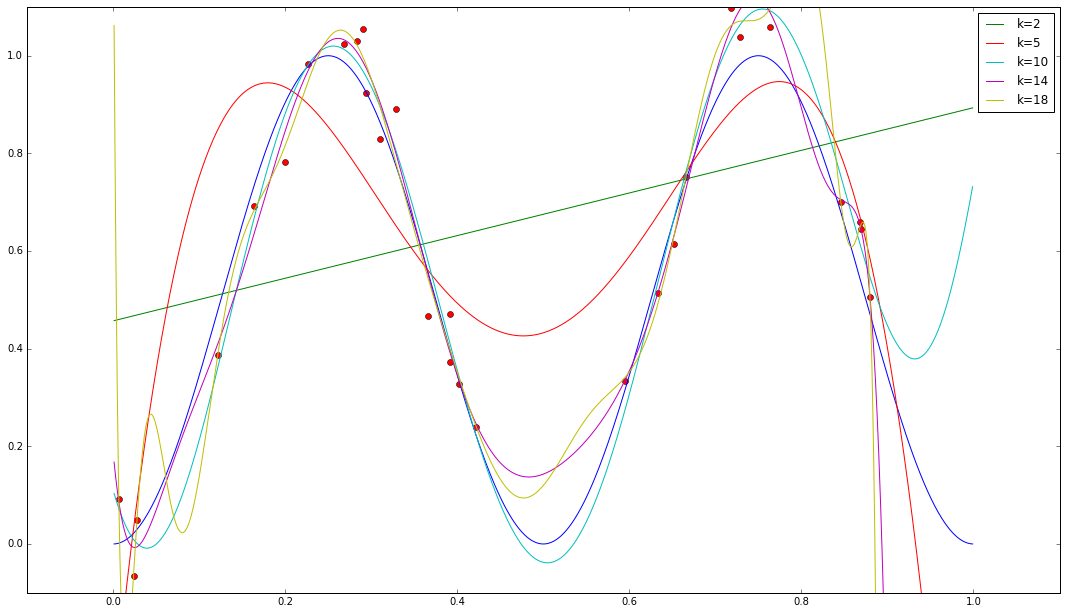

In [19]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.plot(xs, sample_data, 'ro')
plt.plot(sine, [g_func(x) for x in sine])
for k, weight in enumerate(weights):
    plt.plot(sine, predict_y(weight, sine), label="k={}".format([2, 5, 10, 14, 18][k]))
    plt.legend()

In [39]:
def sin_mse(output, predicted):
    total_error = 0
    for y, py in zip(output, predicted):
        total_error += (y - py) ** 2
    return total_error

In [40]:
weights = []

for k_val in range(1, 19):
    phi = feature_matrix(xs, lambda k, i: k ** i, k_val)
    weights.append(get_weights(phi, sample_data))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


In [41]:
errors = []
ks = []
from math import log
for i, weight in enumerate(weights):
    predicted = predict_y(weight, xs)
    errors.append(log(sin_mse(output=sample_data, predicted=predicted)))
    ks.append(i + 1)

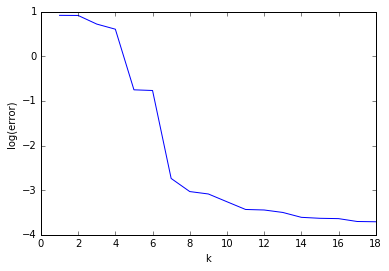

In [43]:
plt.plot(ks, errors)
plt.xlabel("k")
plt.ylabel("log(error)")

In [44]:
test_x, test_y = create_random_data(1000, 0.07, 0)

In [45]:
errors, ks = [], []
for i, weight in enumerate(weights):
    predicted = predict_y(weight, test_x)
    errors.append(log(sin_mse(output=test_y, predicted=predicted)))
    ks.append(i + 1)

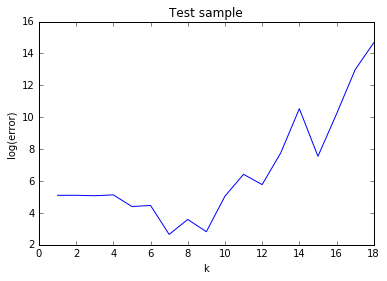

In [48]:
plt.plot(ks, errors)
plt.xlabel("k")
plt.ylabel("log(error)")
plt.title("Test sample")

In [49]:
def predict_output(weights, xs, func):
    tot_arr = []
    for x in xs:
        total = 0
        for i, weight in enumerate(weights):
            total += (weight * func(x, i))
        tot_arr.append(total)
    return tot_arr

def average_runs(func):
    train_err, test_err = [0] * 18, [0] * 18
    for _ in range(100):
        train_x, train_y = create_random_data(30, 0.07, 0)
        test_x, test_y = create_random_data(1000, 0.07, 0)
        weights = []
        for k_val in range(1, 19):
            phi = feature_matrix(train_x, func, k_val)
            weights.append(get_weights(phi, train_y))
        for i, weight in enumerate(weights):
            predicted = predict_output(weight, train_x, func)
            train_err[i] += (log(sin_mse(output=train_y, predicted=predicted)))
            predicted = predict_output(weight, test_x, func)
            test_err[i] += (log(sin_mse(output=test_y, predicted=predicted)))
    return list(map(lambda k: k / 100, train_err)), list(map(lambda k: k / 100, test_err))

In [50]:
train, test = average_runs(lambda k, i: k ** i)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


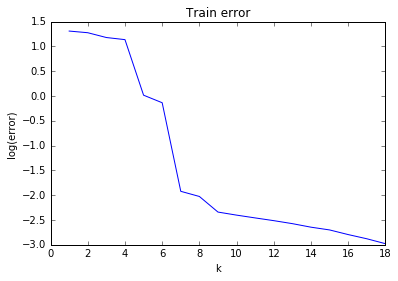

In [54]:
plt.plot([i for i in range(1, 19)], train)
plt.title("Train error")
plt.xlabel("k")
plt.ylabel("log(error)")

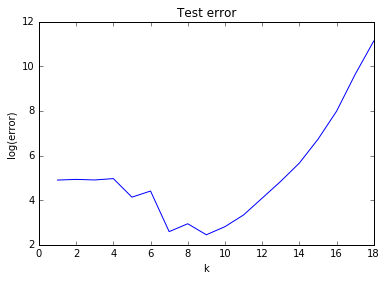

In [55]:
plt.plot([i for i in range(1, 19)], test)
plt.title("Test error")
plt.xlabel("k")
plt.ylabel("log(error)")

In [122]:
train, test = average_runs(lambda k, i: sin((i + 1) * pi * (k)))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


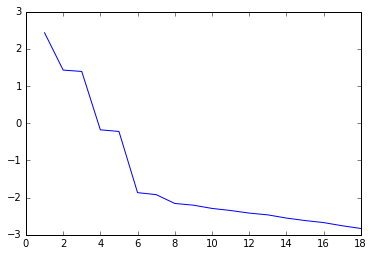

In [123]:
plt.plot([i for i in range(1, 19)], train)

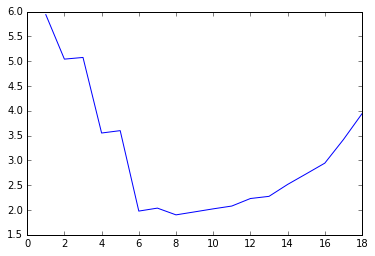

In [124]:
plt.plot([i for i in range(1, 19)], test)

In [80]:
weights = []

for k_val in range(1, 19):
    phi = feature_matrix(xs, lambda k, i: sin(i * pi * k), k_val)
    weights.append(get_weights(phi, sample_data))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


In [81]:
def predict_function(xs, weights, func):
    predicted = []
    for x in xs:
        total = 0
        for i, w in enumerate(weights):
            total += w * func(x, i)
        predicted.append(total)
    return predicted



In [84]:
train_err, test_err = [0] * 18, [0] * 18
test_x, test_y = create_random_data(1000, 0.07, 0)
func = lambda k, i: sin(i * pi * k)
for i, weight in enumerate(weights):
    predicted = predict_output(weight, xs, func)
    train_err[i] += (log(sin_mse(output=sample_data, predicted=predicted)))
    predicted = predict_output(weight, test_x, func)
    test_err[i] += (log(sin_mse(output=test_y, predicted=predicted)))

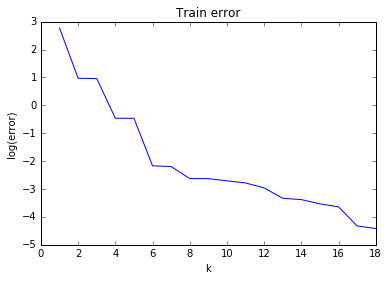

In [89]:
plt.plot([i + 1 for i in range(18)], train_err)
plt.title("Train error")
plt.xlabel("k")
plt.ylabel("log(error)")

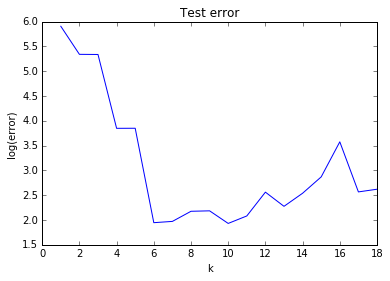

In [90]:
plt.plot([i + 1 for i in range(18)], test_err)
plt.title("Test error")
plt.xlabel("k")
plt.ylabel("log(error)")

In [92]:
train_err, test_err = average_runs(lambda k, i: (sin(i * k * pi)))

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


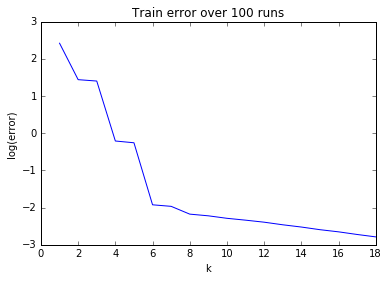

In [93]:
plt.plot([i + 1 for i in range(18)], train_err)
plt.title("Train error over 100 runs")
plt.xlabel("k")
plt.ylabel("log(error)")

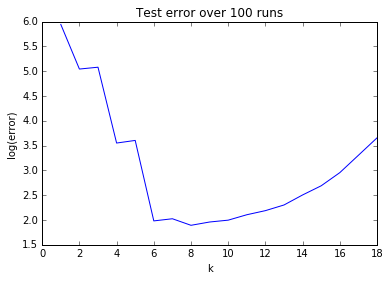

In [94]:
plt.plot([i + 1 for i in range(18)], test_err)
plt.title("Test error over 100 runs")
plt.xlabel("k")
plt.ylabel("log(error)")